In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('data/data_cleaned.csv')
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  yr_built  yr_renovated  zipcode      lat  \
0         0.0   0.0          3  ...      1955             0    98178  47.5112   
1         0.0   0.0          3  ...      1951          1991    98125  47.7210   
2         0.0   0.0          3  ...      1933             0    98028  47.7379   
3         0.0   0.0          5  ...      1965             0    98136  47.5208   
4         0.0   0.0          3  ...      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  month  yrs_since_reno  bed_bath_ratio  
0 -122.257           1340        5650     10            2014        3.000000  
1 -122.319           1690        7639     12              23        1.333333  
2 -122.233           2720        8062      2            2015        2.000000  
3 -122.393           1360        5000     12            2014        1.333333  
4 -122.045           1800        7503      2            2015        1.500000  

[5 rows x 22 columns]

In [3]:
df.drop(['date'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21420 non-null  float64
 1   bedrooms        21420 non-null  int64  
 2   bathrooms       21420 non-null  float64
 3   sqft_living     21420 non-null  int64  
 4   sqft_lot        21420 non-null  int64  
 5   floors          21420 non-null  float64
 6   waterfront      21420 non-null  float64
 7   view            21420 non-null  float64
 8   condition       21420 non-null  int64  
 9   grade           21420 non-null  int64  
 10  sqft_basement   21420 non-null  float64
 11  yr_built        21420 non-null  int64  
 12  yr_renovated    21420 non-null  int64  
 13  zipcode         21420 non-null  int64  
 14  lat             21420 non-null  float64
 15  long            21420 non-null  float64
 16  sqft_living15   21420 non-null  int64  
 17  sqft_lot15      21420 non-null 

## Baseline Model

In [5]:
outcome = 'price'
predictors = df.drop('price', axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [6]:
baseline_model = ols(formula=formula, data=df).fit()

In [7]:
type(baseline_model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [8]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2567.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:12:59   Log-Likelihood:            -2.9178e+05
No. Observations:               21420   AIC:                         5.836e+05
Df Residuals:                   21399   BIC:                         5.838e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.477e+07   9.91e+06     -6.537      0.000   -8.42e+07   -4.53e+07
bedrooms       -9.655e+04   3277.786    -29.455      0.000   -1.03e+05   -9.01e+04
bathrooms       1.476e+05   5719.983     25.801      0.000    1.36e+05    1.59e+05
sqft_living      169.9092      3.666     46.350      0.000     162.724     177.094
sqft_lot           0.1070      0.048      2.251      0.024       0.014       0.200
floors          8795.4473   3556.855      2.473      0.013    1823.745    1.58e+04
waterfront      5.231e+05   1.66e+04     31.568      0.000    4.91e+05    5.56e+05
view            5.449e+04   2088.540     26.091      0.000    5.04e+04    5.86e+04
condition       3.145e+04   2348.638     13.392      0.000    2.68e+04    3.61e+04
grade           9.593e+04   2150.447     44.608      0.000    9.17e+04       1e+05
sqft_basement    -19.3381      4.312     -4.485      0.000     -27.789     -10.887
yr_built       -2508.3562     71.819    -34.926      0.000   -2649.126   -2367.586
yr_renovated    3.655e+04   4692.400      7.789      0.000    2.74e+04    4.57e+04
zipcode         -607.1898     32.863    -18.476      0.000    -671.604    -542.775
lat              6.06e+05   1.07e+04     56.739      0.000    5.85e+05    6.27e+05
long           -2.123e+05   1.31e+04    -16.226      0.000   -2.38e+05   -1.87e+05
sqft_living15     28.7309      3.442      8.348      0.000      21.985      35.477
sqft_lot15        -0.3955      0.073     -5.436      0.000      -0.538      -0.253
month           1361.0379    703.639      1.934      0.053     -18.147    2740.223
yrs_since_reno  3.652e+04   4692.297      7.784      0.000    2.73e+04    4.57e+04
bed_bath_ratio  1.158e+05   5143.535     22.509      0.000    1.06e+05    1.26e+05
==============================================================================
Omnibus:                    17324.207   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1506830.177
Skew:                           3.327   Prob(JB):                         0.00
Kurtosis:                      43.547   Cond. No.                     7.32e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations:
- Confidence interval for month includes 0. Chance of no relationship with target
- Bedrooms has a negative coefficient (need to examine)
- According to sqft_living coeff, price per sqft is about $170
- sqft_basement has negative coeff
- sqft_lot15 has negative coeff
- sqft_lot has very small coeff
- yr_built has negative coeff, while yr_renovated is positive
- month has p-value slightly over 0.05 (0.053), making it the least relevant feature currently

JB value of 6 or higher indicates that errors are not normally distributed
- JB = 1506830.177




In [9]:
X = df.drop("price", axis = 1)
Y = df['price']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 25)
baseline_linreg = LinearRegression()
baseline_linreg.fit(X_train, Y_train)
Y_pred = baseline_linreg.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
mse_train = mean_squared_error(Y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(Y_test, Y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 204049.23830834476
Test RMSE: 185223.8167396286


In [13]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'yrs_since_reno', 'bed_bath_ratio'],
      dtype='object')

### Another multicolinearity check

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
X = predictors
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(predictors, vif))

[('bedrooms', 70.78386833025283),
 ('bathrooms', 89.46528453170541),
 ('sqft_living', 37.50211921849836),
 ('sqft_lot', 2.375589147278171),
 ('floors', 17.19979550455687),
 ('waterfront', 1.1596190900935792),
 ('view', 1.5022566615906274),
 ('condition', 35.47877427156492),
 ('grade', 149.6151425103302),
 ('sqft_basement', 2.752195121453835),
 ('yr_built', 10676.587579403915),
 ('yr_renovated', 141361.62048229066),
 ('zipcode', 5232304.820490609),
 ('lat', 138906.45723803443),
 ('long', 1375973.3662308326),
 ('sqft_living15', 28.11223408766165),
 ('sqft_lot15', 2.5962005270497666),
 ('month', 6.1845506248446345),
 ('yrs_since_reno', 4024134.8385890764),
 ('bed_bath_ratio', 49.83760638553746)]

Suggests there is moderate multicolinearity in some of the variables. Variables that exhibit the least multicolinearity are sqft_lot, waterfront, view, sqft_basement, month

### Normality Check
Already have seen pretty high JB value

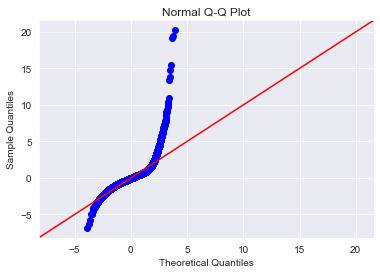

In [16]:
resid1 = baseline_model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.savefig('images/baseline-qq.png')

We've got quite a few outliers still in the dataframe, which could be contributing to this awful plot. The non-normally distributed errors also suggest that the data could benefit from a log transform

### Homoscedasticity check

In [17]:
plt.scatter(baseline_model.predict(predictors), baseline_model.resid, alpha=0.5)
plt.plot(baseline_model.predict(predictors), [0 for i in range(len(df))])
plt.title('Versus Fits')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.savefig('images/baseline-homosc.png')

Errors seem to increase based on target variable/ cone-shaped. Model is heteroscedastic. Errors start getting quite high above ~2.25.

### Treat outliers

In [18]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    plt.figure(figsize=(12, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [19]:
def qqplot_feat(df, variable):
    f = 'price~' + variable
    model = ols(formula=f, data=df).fit()
    resid = model.resid
    sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

In [20]:
def log_diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    plt.figure(figsize=(12, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(np.log(df[variable]), bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=np.log(df[variable]))
    plt.title('Boxplot')

    plt.show()

#### Bedrooms

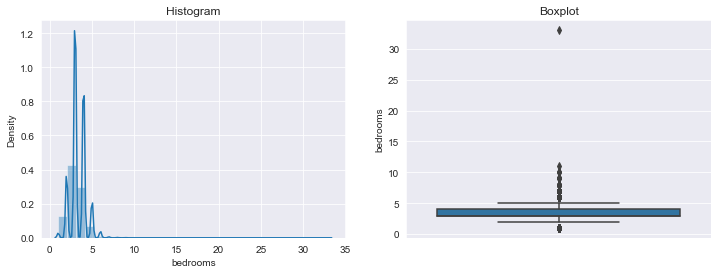

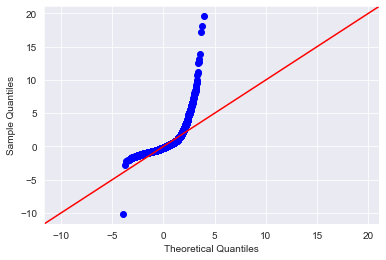

In [21]:
diagnostic_plots(df, 'bedrooms')
qqplot_feat(df, 'bedrooms')

In [22]:
df[df['bedrooms'] > 7]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1643    490000.0         8       5.00         2800      2580     2.0   
3997   2150000.0         8       6.00         4340      9415     2.0   
4029    373000.0         8       3.00         2850     12714     1.0   
4057    599999.0         9       4.50         3830      6988     2.5   
4196    700000.0         9       3.00         3680      4400     2.0   
6025   1280000.0         9       4.50         3650      5000     2.0   
6120    340000.0         8       2.75         2790      6695     1.0   
8469    450000.0         9       7.50         4050      6504     2.0   
8679    520000.0        11       3.00         3000      4960     2.0   
8996    700000.0         8       2.50         2280      3000     1.5   
9363    900000.0         8       4.00         4020      7500     1.0   
10853  1650000.0         8       2.75         4040     20666     1.0   
12758   808000.0         8       3.75         3460      4600     2.0   
13182  1150000.0        10       5.25         4590     10920     1.0   
14922   430000.0         8       3.25         4300     10441     2.0   
15011   650000.0        10       2.00         3610     11914     2.0   
15512   680000.0         8       2.75         2530      4800     2.0   
15710   640000.0        33       1.75         1620      6000     1.0   
16680  1400000.0         9       4.00         4620      5508     2.5   
17068  1970000.0         8       3.50         4440      6480     2.0   
18265   934000.0         9       3.00         2820      4480     2.0   
18299  3300000.0         8       4.00         7710     11750     3.5   
19070   660000.0        10       3.00         2920      3745     2.0   
19118   575000.0         8       3.00         3840     15990     1.0   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
1643          0.0   0.0          3      8  ...      1997             0   
3997          0.0   0.0          3      8  ...      1967             0   
4029          0.0   0.0          3      7  ...      1959             0   
4057          0.0   0.0          3      7  ...      1938             0   
4196          0.0   0.0          3      7  ...      1908             0   
6025          0.0   0.0          3      8  ...      1915          2010   
6120          0.0   0.0          3      7  ...      1977             0   
8469          0.0   0.0          3      7  ...      1996             0   
8679          0.0   0.0          3      7  ...      1918          1999   
8996          0.0   0.0          3      7  ...      1911             0   
9363          0.0   0.0          3      8  ...      1968             0   
10853         0.0   0.0          4      9  ...      1962             0   
12758         0.0   0.0          3      7  ...      1987             0   
13182         0.0   2.0          3      9  ...      2008             0   
14922         0.0   0.0          4      8  ...      1979             0   
15011         0.0   0.0          4      7  ...      1958             0   
15512         0.0   0.0          4      7  ...      1901             0   
15710         0.0   0.0          5      7  ...      1947             0   
16680         0.0   0.0          3     11  ...      1915             0   
17068         0.0   3.0          5     10  ...      1959             0   
18265         0.0   0.0          3      7  ...      1918             0   
18299         0.0   0.0          5     12  ...      1904             0   
19070         0.0   0.0          4      7  ...      1913             0   
19118         0.0   0.0          3      7  ...      1961             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  month  \
1643     98122  47.6086 -122.303           1800        2580     12   
3997     98004  47.6316 -122.202           2050        9100     10   
4029     98055  47.4859 -122.205           1480        4942      2   
4057     98103  47.6927 -122.338           1460        6291      5   
4196     

In [23]:
from matplotlib import ticker

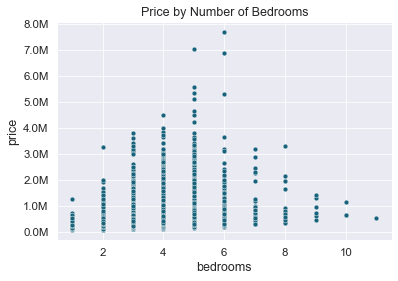

In [24]:
sns.set_context('paper', font_scale = 1.3)

ax = sns.scatterplot('bedrooms', 'price', data=df[df['bedrooms'] < 33], color='#18637b')
ax.set_title('Price by Number of Bedrooms')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))

In [25]:
#Finding a cutoff point
for i in range(90, 101):
    q = i / 100
    print('{} percentile: {}'.format(q, df['bedrooms'].quantile(q=q)))

0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0
1.0 percentile: 33.0


In [26]:
df_no_fliers = df[df['bedrooms'] <= 12]

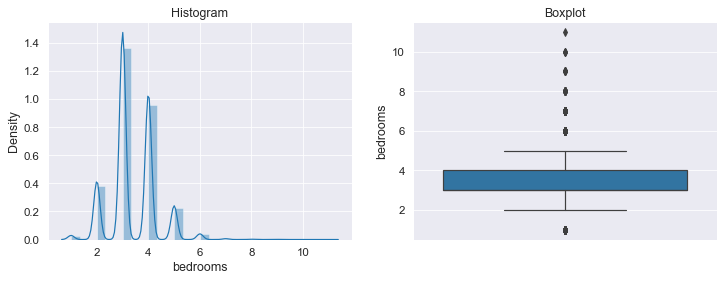

In [27]:
diagnostic_plots(df_no_fliers, 'bedrooms')
qqplot_feat(df_no_fliers, 'bedrooms')

Some improvements but doesn't totally take care of the problem. Should examine this data for more than one slope.

#### Bed-bath ratio

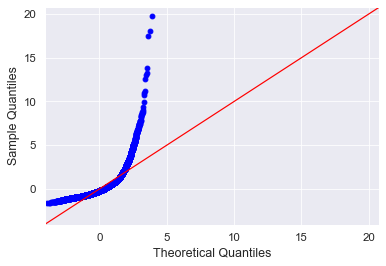

In [28]:
diagnostic_plots(df_no_fliers, 'bed_bath_ratio')
qqplot_feat(df_no_fliers, 'bed_bath_ratio')

In [29]:
#Finding a cutoff point
for i in range(90, 101):
    q = i / 100
    print('{} percentile: {}'.format(q, df_no_fliers['bed_bath_ratio'].quantile(q=q)))

0.9 percentile: 3.0
0.91 percentile: 3.0
0.92 percentile: 3.0
0.93 percentile: 3.0
0.94 percentile: 3.0
0.95 percentile: 3.0
0.96 percentile: 3.0
0.97 percentile: 3.0
0.98 percentile: 3.333333333333333
0.99 percentile: 4.0
1.0 percentile: 8.0


Bed_bath_ratio of 8.0 is a clear outlier. 8 bedrooms to one bathroom seems to be a mistake or possibly a communal bathroom situation. A person or family pricing their home is not likely to have this situation.

In [30]:
df_no_fliers[df_no_fliers['bed_bath_ratio'] > 4]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
941     435000.0         5       1.00         1410      6750     1.5   
1794    300000.0         5       1.00         1940      8875     1.0   
1985    560000.0         5       1.00         1710      9100     1.5   
2221   1000000.0         5       1.00         2010      5210     1.5   
2343    230000.0         5       1.00         1920     19040     1.0   
2679    239950.0         5       1.00         1460      6032     2.0   
3427    345950.0         5       1.00         1340     11198     1.5   
3581    563000.0         6       1.00         1730      2760     1.5   
4135    438000.0         5       1.00         1950      6250     1.5   
4231    544500.0         5       1.00         1690      3240     1.5   
4665    775000.0         5       1.00         1860      3040     1.5   
5388    540000.0         5       1.00         2480      4400     1.5   
5700    525000.0         5       1.00         1280      3876     1.5   
6321    800000.0         6       1.00         1430     20620     2.0   
7438    549000.0         5       1.00         1500      3978     2.0   
8112    495000.0         5       1.00         1810     11205     1.5   
8266   1300000.0         5       1.00         1670      6400     1.5   
8380    340000.0         5       1.00         1880      3774     1.5   
8552    575000.0         7       1.50         2670     11250     1.5   
9049    310000.0         7       1.50         2660     15111     1.5   
9058    320000.0         5       1.00         1740     27350     1.0   
9119    625000.0         5       1.00         3240      5324     2.0   
9481    274000.0         5       1.00         1680      9383     1.0   
9646    518000.0         5       1.00         1590      5000     1.5   
10306   185000.0         5       1.00         1590      6700     1.5   
10319   630000.0         5       1.00         3020      4800     2.0   
10548   295832.0         5       1.00         1410      6400     1.0   
11332   340000.0         5       1.00         1120      9022     1.5   
11925   312500.0         4       0.50         2300      5570     2.0   
12218   415000.0         6       1.00         1370      5080     1.5   
12483   291000.0         7       1.00         2350      8636     1.0   
12867   260000.0         5       1.00         1600      7350     1.0   
12953   677500.0         5       1.00         2340      4730     2.0   
12996   346000.0         5       1.00         1790     30456     1.0   
13018   950000.0         6       1.00         2330      5000     1.5   
13390   620000.0         5       1.00         2230     16800     1.5   
13548   550000.0         5       1.00         2150    262231     1.5   
14085   142500.0         4       0.75         1440     13300     1.0   
14363   435000.0         5       1.00         2170     65340     1.5   
14571   590000.0         5       1.00         1840      6710     1.5   
15011   650000.0        10       2.00         3610     11914     2.0   
15177   520000.0         4       0.75         1960      8277     1.0   
15479   235000.0         5       1.00         1500      9282     1.5   
15803   180000.0         5       1.00         1460     11726     1.5   
15967   780500.0         5       1.00         1760      4264     2.0   
16103   847000.0         5       1.00         2550      4623     2.5   
16179   890000.0         5       1.00         2590      4652     2.0   
16845   230000.0         5       1.00         1410      9000     1.0   
17070   569950.0         5       1.00         1420      6250     1.5   
17594   539000.0         5       1.00         1700     11727     1.5   
17699   642000.0         6       1.00         1530      4305     1.5   
18113   397000.0         5       1.00         1170      6757     1.0   
18349   220000.0         5       1.00         1260      8382     1.5   
18498   262000.0         5       1.00         1870      7800     1.0   
18903   774900.0         5       1.00         1750 

In [31]:
df_no_fliers = df_no_fliers[df_no_fliers['bed_bath_ratio'] <= 4]

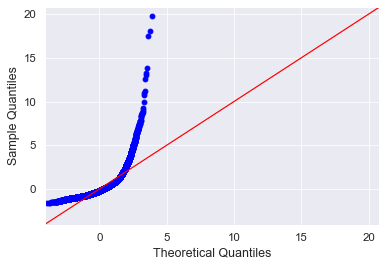

In [32]:
diagnostic_plots(df_no_fliers, 'bed_bath_ratio')
qqplot_feat(df_no_fliers, 'bed_bath_ratio')

<AxesSubplot:xlabel='bed_bath_ratio', ylabel='price'>

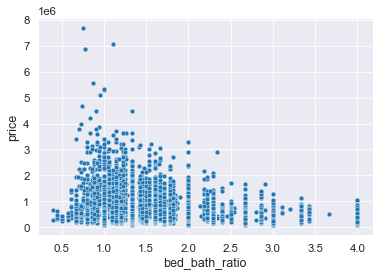

In [33]:
sns.scatterplot('bed_bath_ratio', 'price', data=df_no_fliers)

Minor improvement with removal of outlier. Dropped bed_bath_ratio over 4 to reduce noise. Also, more than 4 bedrooms to 1 bathroom isn't very representative of most living situations.

#### Bathrooms

In [34]:
#Finding a cutoff point
for i in range(0, 10):
    q = i / 100
    print('{} percentile: {}'.format(q, df_no_fliers['bathrooms'].quantile(q=q)))

0.0 percentile: 0.5
0.01 percentile: 1.0
0.02 percentile: 1.0
0.03 percentile: 1.0
0.04 percentile: 1.0
0.05 percentile: 1.0
0.06 percentile: 1.0
0.07 percentile: 1.0
0.08 percentile: 1.0
0.09 percentile: 1.0


In [35]:
df_no_fliers = df_no_fliers[df_no_fliers['bathrooms'] >= 1]

Under one bathroom means a property has no bathrooms or only a powder room/ no shower or bath.

In [36]:
df_no_fliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21293 entries, 0 to 21418
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21293 non-null  float64
 1   bedrooms        21293 non-null  int64  
 2   bathrooms       21293 non-null  float64
 3   sqft_living     21293 non-null  int64  
 4   sqft_lot        21293 non-null  int64  
 5   floors          21293 non-null  float64
 6   waterfront      21293 non-null  float64
 7   view            21293 non-null  float64
 8   condition       21293 non-null  int64  
 9   grade           21293 non-null  int64  
 10  sqft_basement   21293 non-null  float64
 11  yr_built        21293 non-null  int64  
 12  yr_renovated    21293 non-null  int64  
 13  zipcode         21293 non-null  int64  
 14  lat             21293 non-null  float64
 15  long            21293 non-null  float64
 16  sqft_living15   21293 non-null  int64  
 17  sqft_lot15      21293 non-null 

#### Price
There are some obvious price outliers across most predictors, looking at the scatterplots in my previous notebook. This could improve the relationships between price and X across multiple dimensions

In [37]:
#Finding a cutoff point
for i in range(90, 101):
    q = i / 100
    print('{} percentile: {}'.format(q, df_no_fliers['price'].quantile(q=q)))

0.9 percentile: 890000.0
0.91 percentile: 920000.0
0.92 percentile: 953962.5199999991
0.93 percentile: 998912.0000000002
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1980000.0
1.0 percentile: 7700000.0


In [38]:
df_no_fliers[df_no_fliers['price'] > 5000000].count()

price             7
bedrooms          7
bathrooms         7
sqft_living       7
sqft_lot          7
floors            7
waterfront        7
view              7
condition         7
grade             7
sqft_basement     7
yr_built          7
yr_renovated      7
zipcode           7
lat               7
long              7
sqft_living15     7
sqft_lot15        7
month             7
yrs_since_reno    7
bed_bath_ratio    7
dtype: int64

In [39]:
df_no_fliers = df_no_fliers[df_no_fliers['price'] <= 5000000]

Chose 5000000 as a cutoff value for price based on scatterplots of all variables and the potential cut-off values shown when inspecting quantiles.

In [40]:
diagnostic_plots(df_no_fliers, 'price')

In [41]:
log_diagnostic_plots(df_no_fliers, 'price')

Price data will greatly benefit from a log transformation

In [42]:
df_no_fliers.drop(['yr_renovated'], axis=1, inplace=True)

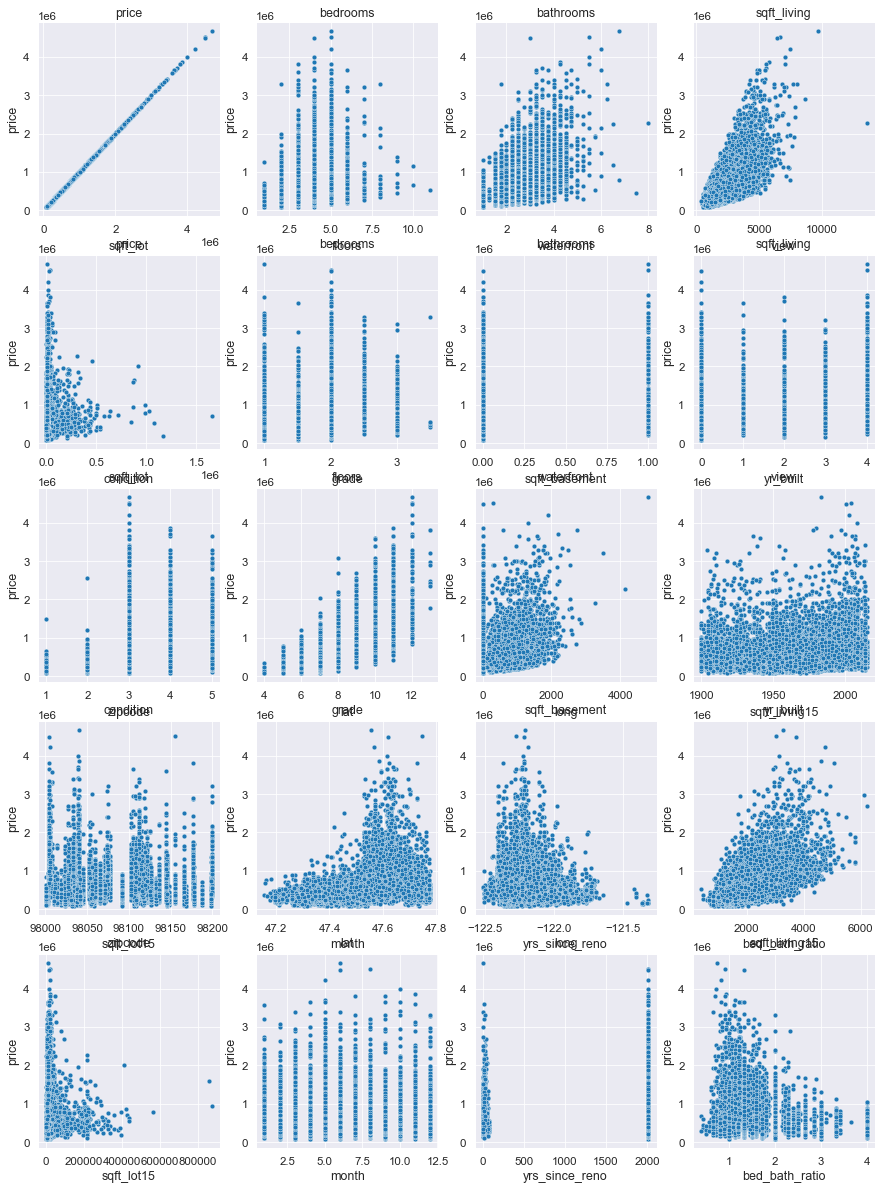

In [43]:
plt.figure(figsize=(15,25))

for index, col in enumerate(df_no_fliers.columns):
    ax = plt.subplot(6, 4, index+1)
    sns.scatterplot(x=col, y='price', data=df_no_fliers, ax=ax)
    ax.set_title('{}'.format(col))

In [44]:
df_no_fliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21286 entries, 0 to 21418
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21286 non-null  float64
 1   bedrooms        21286 non-null  int64  
 2   bathrooms       21286 non-null  float64
 3   sqft_living     21286 non-null  int64  
 4   sqft_lot        21286 non-null  int64  
 5   floors          21286 non-null  float64
 6   waterfront      21286 non-null  float64
 7   view            21286 non-null  float64
 8   condition       21286 non-null  int64  
 9   grade           21286 non-null  int64  
 10  sqft_basement   21286 non-null  float64
 11  yr_built        21286 non-null  int64  
 12  zipcode         21286 non-null  int64  
 13  lat             21286 non-null  float64
 14  long            21286 non-null  float64
 15  sqft_living15   21286 non-null  int64  
 16  sqft_lot15      21286 non-null  int64  
 17  month           21286 non-null 

### Decisions
Dropping more multicolinear features:
- drop yr_renovated, keep yrs_since_reno as yrs_since_reno is independent of the exact year renovated. We don't necessarily need to know exact year, but the time between a home's last reno and last sale is informative. Also these variables are perfectly multicolinear
- Will consider dropping yr_built in the next model

Outlier removal:
- drop bed_bath_ratio over 4
- drop bedrooms over 12
- drop bathrooms under 1
- drop price over 5000000

## Model 2

In [45]:
outcome = 'price'
predictors = df_no_fliers.drop('price', axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [46]:
model2 = ols(formula=formula, data=df_no_fliers).fit()

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2759.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:13:14   Log-Likelihood:            -2.8892e+05
No. Observations:               21286   AIC:                         5.779e+05
Df Residuals:                   21266   BIC:                         5.780e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        7.07e+06   2.79e+06      2.535      0.011     1.6e+06    1.25e+07
bedrooms       -8.472e+04   3247.324    -26.089      0.000   -9.11e+04   -7.84e+04
bathrooms       1.319e+05   5612.550     23.504      0.000    1.21e+05    1.43e+05
sqft_living      149.2797      3.551     42.041      0.000     142.320     156.240
sqft_lot           0.1311      0.045      2.890      0.004       0.042       0.220
floors          1.265e+04   3400.510      3.721      0.000    5989.166    1.93e+04
waterfront      4.968e+05   1.61e+04     30.792      0.000    4.65e+05    5.28e+05
view            5.516e+04   1998.161     27.606      0.000    5.12e+04    5.91e+04
condition       3.172e+04   2245.696     14.127      0.000    2.73e+04    3.61e+04
grade               1e+05   2067.792     48.372      0.000     9.6e+04    1.04e+05
sqft_basement    -16.1362      4.119     -3.918      0.000     -24.210      -8.063
yr_built       -2477.3664     68.800    -36.008      0.000   -2612.219   -2342.513
zipcode         -578.7664     31.415    -18.423      0.000    -640.343    -517.190
lat             6.004e+05   1.02e+04     58.878      0.000     5.8e+05     6.2e+05
long            -2.06e+05   1.25e+04    -16.418      0.000   -2.31e+05   -1.81e+05
sqft_living15     37.1266      3.302     11.243      0.000      30.654      43.599
sqft_lot15        -0.3643      0.069     -5.243      0.000      -0.500      -0.228
month          -2881.4596    418.108     -6.892      0.000   -3700.984   -2061.936
yrs_since_reno   -25.7291      3.780     -6.806      0.000     -33.139     -18.319
bed_bath_ratio  1.014e+05   5235.618     19.360      0.000    9.11e+04    1.12e+05
==============================================================================
Omnibus:                    12456.139   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           302278.875
Skew:                           2.357   Prob(JB):                         0.00
Kurtosis:                      20.850   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations
- Previously had JB value 1506830.177. New JB of 302278.875 is much lower
- Confidence interval for month no longer crosses 0
- bedrooms coefficient still negative 
- sqft_basement coeff still negative
- sqft_lot15 coeff still negative
- yrs_since_reno now negative (makes more sense than a positive coefficient, as more years since reno means less "new")
- some improved p-values

In [48]:
X = df_no_fliers.drop("price", axis = 1)
Y = df_no_fliers['price']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 25)
linreg2 = LinearRegression()
linreg2.fit(X_train, Y_train)
Y_pred = linreg2.predict(X_test)

In [50]:
mse_train = mean_squared_error(Y_train, linreg2.predict(X_train))
mse_test = mean_squared_error(Y_test, Y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 190805.6573800126
Test RMSE: 187310.7175347925


RMSE values of test & train data are closer together

### Normality Check

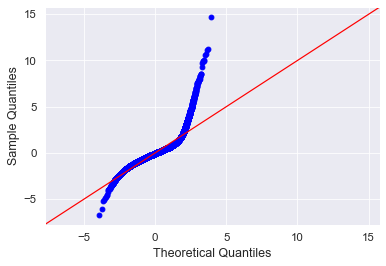

In [51]:
resid2 = model2.resid
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

Much better than first iteration. Improved normality of residuals

### Homoscedasticity Check

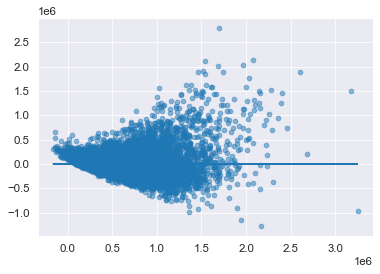

In [52]:
plt.scatter(model2.predict(predictors), model2.resid, alpha=0.5)
plt.plot(model2.predict(predictors), [0 for i in range(len(df_no_fliers))])

Less heteroscedastic than baseline model

### Multicolinearity Check

<AxesSubplot:>

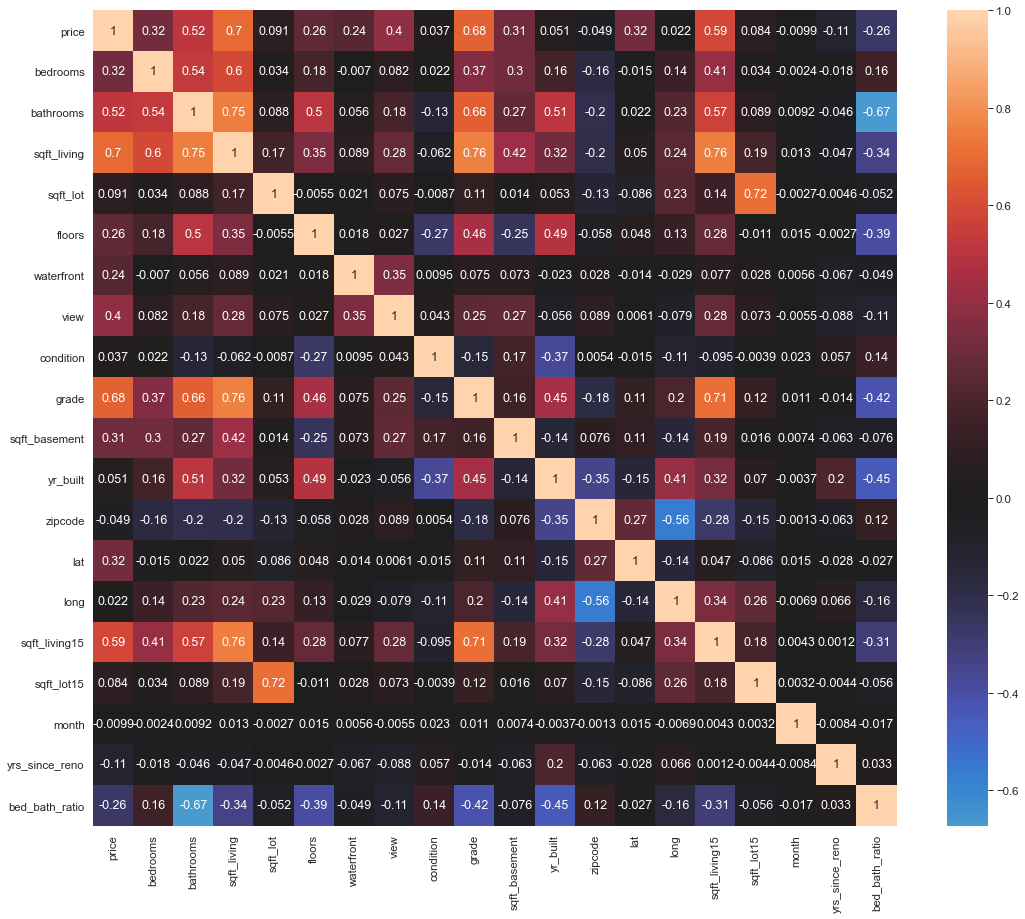

In [53]:
corr = df_no_fliers.corr()

plt.figure(figsize=(18,15))
sns.heatmap(data = corr, center= 0, annot= True)

#### Observations
Correlation with absolute value of 0.7-0.8 is considered high. 

Sqft_living has the highest correlation with price (0.7), followed by grade (0.67)

Correlations among features (0.75 cutoff value):
- sqft_living and grade (0.76) --> is sqft_living factor into the grade of a home?
- sqft_living and sqft_living15 (0.76)
- sqft_living and bathrooms (0.75)

In [54]:
sns.scatterplot('sqft_living', 'sqft_living15', data=df_no_fliers)

<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living15'>

In [55]:
sns.scatterplot('grade', 'sqft_living', data=df_no_fliers)

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

grade seems to be a function of square_ft_living. This may not be an issue when we get dummy variables for grade.

In [56]:
df_no_fliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21286 entries, 0 to 21418
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21286 non-null  float64
 1   bedrooms        21286 non-null  int64  
 2   bathrooms       21286 non-null  float64
 3   sqft_living     21286 non-null  int64  
 4   sqft_lot        21286 non-null  int64  
 5   floors          21286 non-null  float64
 6   waterfront      21286 non-null  float64
 7   view            21286 non-null  float64
 8   condition       21286 non-null  int64  
 9   grade           21286 non-null  int64  
 10  sqft_basement   21286 non-null  float64
 11  yr_built        21286 non-null  int64  
 12  zipcode         21286 non-null  int64  
 13  lat             21286 non-null  float64
 14  long            21286 non-null  float64
 15  sqft_living15   21286 non-null  int64  
 16  sqft_lot15      21286 non-null  int64  
 17  month           21286 non-null 

### More outliers

#### sqft_lot15

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

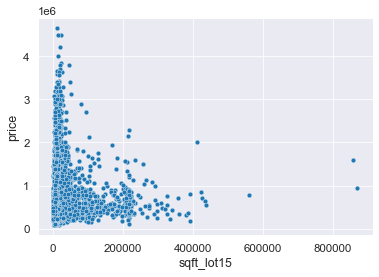

In [57]:
sns.scatterplot('sqft_lot15', 'price', data=df_no_fliers)

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

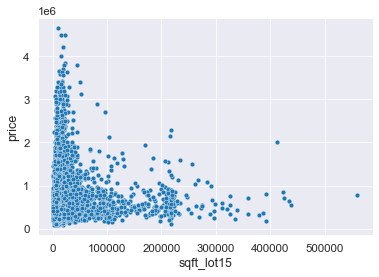

In [58]:
sns.scatterplot('sqft_lot15', 'price', data=df_no_fliers[df_no_fliers['sqft_lot15'] < 700000])

The influence of sqft_lot15 peaks around 10000, then there seems to be a more negative relationship. May need to address this later.

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_lot15'>

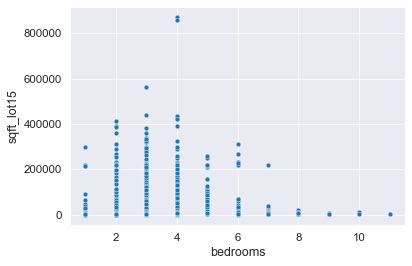

In [59]:
sns.scatterplot('bedrooms', 'sqft_lot15', data=df_no_fliers)

<AxesSubplot:xlabel='sqft_lot15', ylabel='sqft_living15'>

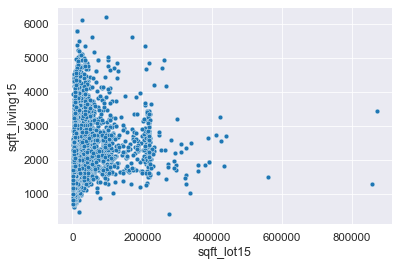

In [60]:
sns.scatterplot('sqft_lot15', 'sqft_living15', data=df_no_fliers)

The variability in sqft_living15 decreases with sqft_lot15. Possibly, sqft_living15 decreases with increasing sqft_lot15. In any case, lot size does not increase with living space size for the nearest 15 neighbors. Meanwhile, sqft_living15 is positively correlated with price. sqft_lot15 increases with bedrooms up to 3 bedrooms, then decreases beyond 3 bedrooms

In [61]:
#Finding a cutoff point
for i in range(90, 101):
    q = i / 100
    print('{} percentile: {}'.format(q, df_no_fliers['sqft_lot15'].quantile(q=q)))

0.9 percentile: 17701.0
0.91 percentile: 19858.100000000013
0.92 percentile: 22321.000000000004
0.93 percentile: 27824.14999999994
0.94 percentile: 35039.7
0.95 percentile: 37067.0
0.96 percentile: 42656.19999999997
0.97 percentile: 51422.50000000004
0.98 percentile: 80366.09999999947
0.99 percentile: 157883.0500000019
1.0 percentile: 871200.0


In [62]:
df_no_fliers[df_no_fliers['sqft_lot15'] > 500000].count()

price             3
bedrooms          3
bathrooms         3
sqft_living       3
sqft_lot          3
floors            3
waterfront        3
view              3
condition         3
grade             3
sqft_basement     3
yr_built          3
zipcode           3
lat               3
long              3
sqft_living15     3
sqft_lot15        3
month             3
yrs_since_reno    3
bed_bath_ratio    3
dtype: int64

In [63]:
# drop sqft_lot15 outlier
df_no_fliers = df_no_fliers[df_no_fliers['sqft_lot15'] <= 500000]

#### sqft_lot

In [64]:
#Finding a cutoff point
for i in range(90, 101):
    q = i / 100
    print('{} percentile: {}'.format(q, df_no_fliers['sqft_lot'].quantile(q=q)))

0.9 percentile: 21339.199999999997
0.91 percentile: 24063.299999999985
0.92 percentile: 28359.64000000019
0.93 percentile: 34834.68000000004
0.94 percentile: 37568.35999999992
0.95 percentile: 43176.29999999999
0.96 percentile: 50613.719999999936
0.97 percentile: 67426.24000000009
0.98 percentile: 107157.0
0.99 percentile: 212227.36000000016
1.0 percentile: 1651359.0


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

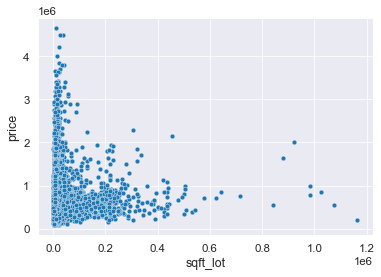

In [65]:
sns.scatterplot('sqft_lot', 'price', data=df_no_fliers[df_no_fliers['sqft_lot'] < 1400000])

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_lot'>

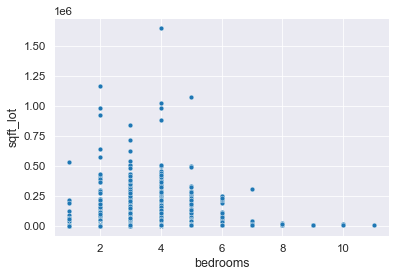

In [66]:
sns.scatterplot('bedrooms', 'sqft_lot', data=df_no_fliers)

Remove sqft_lot outliers 

In [67]:
df_no_fliers = df_no_fliers[df_no_fliers['sqft_lot'] <= 800000]

In [68]:
df_no_fliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21274 entries, 0 to 21418
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21274 non-null  float64
 1   bedrooms        21274 non-null  int64  
 2   bathrooms       21274 non-null  float64
 3   sqft_living     21274 non-null  int64  
 4   sqft_lot        21274 non-null  int64  
 5   floors          21274 non-null  float64
 6   waterfront      21274 non-null  float64
 7   view            21274 non-null  float64
 8   condition       21274 non-null  int64  
 9   grade           21274 non-null  int64  
 10  sqft_basement   21274 non-null  float64
 11  yr_built        21274 non-null  int64  
 12  zipcode         21274 non-null  int64  
 13  lat             21274 non-null  float64
 14  long            21274 non-null  float64
 15  sqft_living15   21274 non-null  int64  
 16  sqft_lot15      21274 non-null  int64  
 17  month           21274 non-null 

### Binning and dummies

#### bedroom

In [69]:
df_no_fliers = df_no_fliers[df_no_fliers['bedrooms'] <= 10]

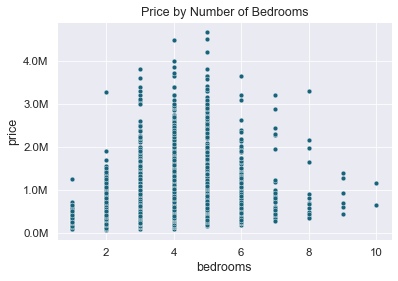

In [70]:
ax = sns.scatterplot('bedrooms', 'price', data=df_no_fliers, color='#18637b')
ax.set_title('Price by Number of Bedrooms')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))
plt.savefig('images/bedrooms.png')
plt.savefig('images/hr-bedrooms.png', dpi=200)


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

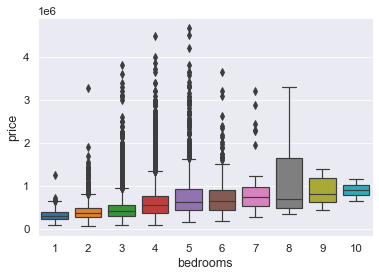

In [71]:
sns.boxplot('bedrooms', 'price', data=df_no_fliers)

There is a positive relationship between bedrooms and price up to 5 bedrooms, then there is a slight negative relationship with price (or at the very least, the relationship changes). It's possible that beyond 6 bedrooms the houses are more cramped. I.e. smaller ratio of bedrooms per unit sqft_living

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>

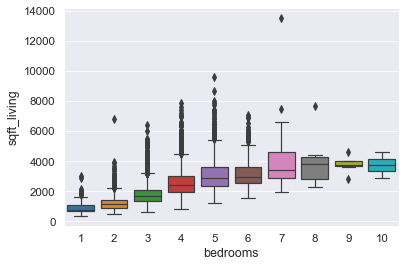

In [72]:
sns.boxplot('bedrooms', 'sqft_living', data=df_no_fliers)

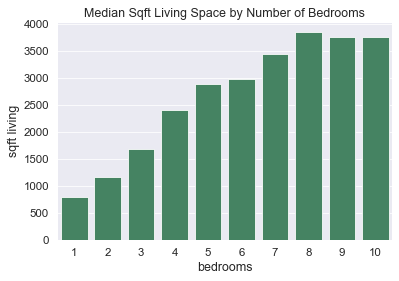

In [73]:
ax = sns.barplot('bedrooms', 'sqft_living', data=df_no_fliers.groupby(['bedrooms']).median().reset_index(), color='#3b8d61')
ax.set_title('Median Sqft Living Space by Number of Bedrooms')
ax.set_ylabel('sqft living')
plt.savefig('images/sqftliving-bedrooms.png')
plt.savefig('images/hr-sqftliving-bedrooms.png', dpi=200);

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>

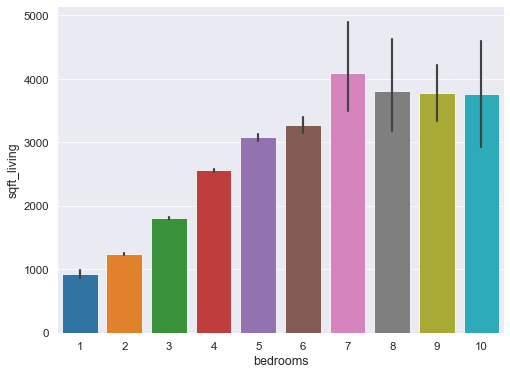

In [74]:
plt.figure(figsize=(8,6))
sns.barplot('bedrooms', 'sqft_living', data=df_no_fliers)

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_lot'>

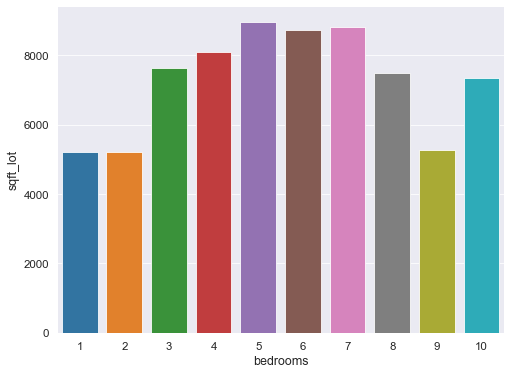

In [75]:
plt.figure(figsize=(8,6))
sns.barplot('bedrooms', 'sqft_lot', data=df_no_fliers.groupby(['bedrooms']).median().reset_index())

After 5 bedrooms, the living space begins tapering off (does not increase as quickly) while sqft_lot begins decreasing. Less square footage of living space per bedroom/ more cramped housing or decreasing lot size can have something to do with the decreasing price beyond 5 bedrooms

In [76]:
df_no_fliers['bedrooms'].value_counts(normalize=True)

3     0.456588
4     0.321534
2     0.127156
5     0.072298
6     0.012081
1     0.007709
7     0.001645
8     0.000611
9     0.000282
10    0.000094
Name: bedrooms, dtype: float64

In [77]:
df_no_fliers.to_csv('data/data_no_fliers')

In [78]:
bins = [0, 4, 10]
labels = ['under5', '5plus']
df_no_fliers['binned_bedrooms'] = pd.cut(df_no_fliers['bedrooms'], bins, labels=labels)

In [79]:
cat = ['binned_bedrooms']
bedroom_dummies = pd.get_dummies(df_no_fliers[cat], prefix='bedrooms', drop_first=True) 

#### view dummies

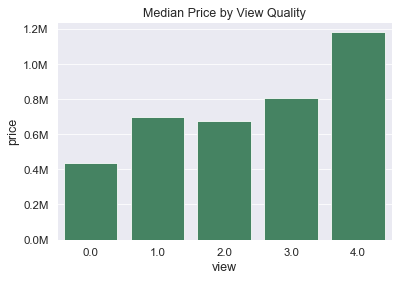

In [80]:
ax = sns.barplot('view', 'price', data=df_no_fliers.groupby('view').median().reset_index(), color='#3b8d61')
ax.set_title('Median Price by View Quality')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))
plt.savefig('images/pirce-view.png')
plt.savefig('images/hr-price-view.png', dpi=200)

In [81]:
bins = [-1, 0, 2, 3, 4]
labels = ['0', '1_2', '3', '4']
df_no_fliers['binned_view'] = pd.cut(df_no_fliers['view'], bins, labels=labels)
view_dummies = pd.get_dummies(df_no_fliers['binned_view'], prefix='view', drop_first=True)

In [82]:
df_no_fliers[['view', 'binned_view']][df_no_fliers['view']==2]

view binned_view
49      2.0         1_2
98      2.0         1_2
112     2.0         1_2
119     2.0         1_2
125     2.0         1_2
...     ...         ...
21337   2.0         1_2
21362   2.0         1_2
21387   2.0         1_2
21400   2.0         1_2
21405   2.0         1_2

[947 rows x 2 columns]

#### grade dummies

<AxesSubplot:xlabel='grade', ylabel='price'>

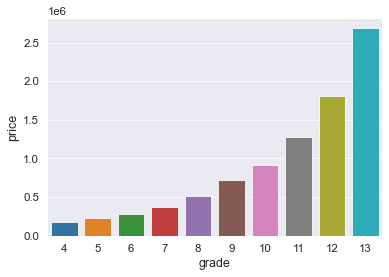

In [83]:
sns.barplot('grade', 'price', data=df_no_fliers.groupby('grade').median().reset_index())

In [84]:
df_no_fliers.grade.value_counts()

7     8836
8     6031
9     2603
6     1959
10    1127
11     392
5      217
12      84
4       14
13      10
Name: grade, dtype: int64

In [85]:
grade_dummies = pd.get_dummies(df_no_fliers['grade'], prefix='grade', drop_first=True)

#### condition dummies

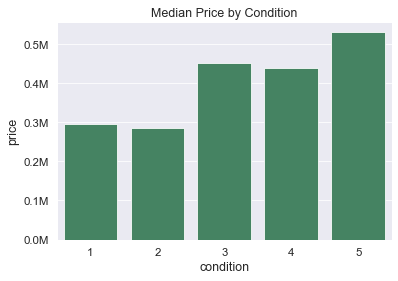

In [86]:
ax = sns.barplot('condition', 'price', data=df_no_fliers.groupby('condition').median().reset_index(), color='#3b8d61')
ax.set_title('Median Price by Condition')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))
plt.savefig('images/price-condition.png')
plt.savefig('images/hr-price-condition.png', dpi=200)

<AxesSubplot:xlabel='condition', ylabel='price'>

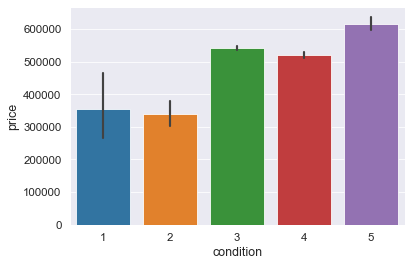

In [87]:
sns.barplot('condition', 'price', data=df_no_fliers)

Will bin condition by values with similar mean and median prices

In [88]:
bins = [0, 2, 4, 6]
labels = ['1_2', '3_4', '5']
df_no_fliers['binned_condition'] = pd.cut(df_no_fliers['condition'], bins, labels=labels)
condition_dummies = pd.get_dummies(df_no_fliers['binned_condition'], prefix='condition', drop_first=True)

In [89]:
df_no_fliers[df_no_fliers['condition'] == 2.0].head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
38   240000.0         4        1.0         1220      8075     1.0         0.0   
241  455000.0         2        1.0         1430      5000     1.5         0.0   
325  186375.0         3        1.0         1000      7636     1.0         0.0   
697  480000.0         4        2.0         2180     10575     1.0         0.0   
872  200000.0         4        2.0         1920      4822     1.0         0.0   

     view  condition  grade  ...      lat     long  sqft_living15  sqft_lot15  \
38    0.0          2      7  ...  47.3341 -122.282           1290        7800   
241   0.0          2      7  ...  47.6727 -122.299           1450        3750   
325   0.0          2      7  ...  47.4720 -122.344           1150        7600   
697   0.0          2      6  ...  47.5890 -122.177           2180       12010   
872   0.0          2      6  ...  47.5507 -122.381           1120        4822   

     month  yrs_since_reno  bed_bath_ratio  binned_bedrooms  binned_view  \
38       2            2015             4.0           under5            0   
241      1            2015             2.0           under5            0   
325      4            2015             3.0           under5            0   
697     11            2014             2.0           under5            0   
872      2            2015             2.0           under5            0   

     binned_condition  
38                1_2  
241               1_2  
325               1_2  
697               1_2  
872               1_2  

[5 rows x 23 columns]

In [90]:
df_binned_dummies = pd.concat([df_no_fliers, bedroom_dummies, grade_dummies, view_dummies, condition_dummies], axis=1)

In [91]:
df_binned_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 0 to 21418
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             21273 non-null  float64 
 1   bedrooms          21273 non-null  int64   
 2   bathrooms         21273 non-null  float64 
 3   sqft_living       21273 non-null  int64   
 4   sqft_lot          21273 non-null  int64   
 5   floors            21273 non-null  float64 
 6   waterfront        21273 non-null  float64 
 7   view              21273 non-null  float64 
 8   condition         21273 non-null  int64   
 9   grade             21273 non-null  int64   
 10  sqft_basement     21273 non-null  float64 
 11  yr_built          21273 non-null  int64   
 12  zipcode           21273 non-null  int64   
 13  lat               21273 non-null  float64 
 14  long              21273 non-null  float64 
 15  sqft_living15     21273 non-null  int64   
 16  sqft_lot15        2127

In [92]:
df_dummies = df_binned_dummies.drop(['bedrooms', 'binned_bedrooms', 'condition', 'binned_condition', 'grade',
                                    'view', 'binned_view'], axis=1)

In [93]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 0 to 21418
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21273 non-null  float64
 1   bathrooms       21273 non-null  float64
 2   sqft_living     21273 non-null  int64  
 3   sqft_lot        21273 non-null  int64  
 4   floors          21273 non-null  float64
 5   waterfront      21273 non-null  float64
 6   sqft_basement   21273 non-null  float64
 7   yr_built        21273 non-null  int64  
 8   zipcode         21273 non-null  int64  
 9   lat             21273 non-null  float64
 10  long            21273 non-null  float64
 11  sqft_living15   21273 non-null  int64  
 12  sqft_lot15      21273 non-null  int64  
 13  month           21273 non-null  int64  
 14  yrs_since_reno  21273 non-null  int64  
 15  bed_bath_ratio  21273 non-null  float64
 16  bedrooms_5plus  21273 non-null  uint8  
 17  grade_5         21273 non-null 

### Decisions
Outlier removal:
- drop sqft_lot over 800000
- drop sqft_lot15 over 500000
- drop bedrooms over 10

Dummies:
- bedrooms (under5, 5plus)
- view (0, 1_2, 3, 4)
- grade (all)
- condition (1_2, 3_4, 5)

## Model 3

In [94]:
df_dummies.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'yrs_since_reno', 'bed_bath_ratio',
       'bedrooms_5plus', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3',
       'view_4', 'condition_3_4', 'condition_5'],
      dtype='object')

In [95]:
outcome = 'price'
predictors = df_dummies.drop('price', axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [96]:
model3 = ols(formula=formula, data=df_dummies).fit()

In [97]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1889.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:13:32   Log-Likelihood:            -2.8812e+05
No. Observations:               21273   AIC:                         5.763e+05
Df Residuals:                   21242   BIC:                         5.765e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.043e+07   2.69e+06      3.880      0.000    5.16e+06    1.57e+07
bathrooms       3.402e+04   3938.235      8.638      0.000    2.63e+04    4.17e+04
sqft_living      110.4890      3.534     31.267      0.000     103.563     117.415
sqft_lot           0.1540      0.059      2.629      0.009       0.039       0.269
floors          2.544e+04   3344.892      7.606      0.000    1.89e+04     3.2e+04
waterfront      4.266e+05   1.74e+04     24.583      0.000    3.93e+05    4.61e+05
sqft_basement      3.7376      4.064      0.920      0.358      -4.228      11.703
yr_built       -2287.6871     65.914    -34.707      0.000   -2416.884   -2158.490
zipcode         -615.2930     30.396    -20.243      0.000    -674.872    -555.715
lat             6.126e+05   9925.606     61.719      0.000    5.93e+05    6.32e+05
long           -2.072e+05   1.22e+04    -16.919      0.000   -2.31e+05   -1.83e+05
sqft_living15     31.7703      3.235      9.822      0.000      25.430      38.111
sqft_lot15        -0.3257      0.079     -4.135      0.000      -0.480      -0.171
month          -2754.3303    406.426     -6.777      0.000   -3550.957   -1957.704
yrs_since_reno   -29.4888      3.655     -8.068      0.000     -36.653     -22.324
bed_bath_ratio -6613.3520   3277.909     -2.018      0.044    -1.3e+04    -188.402
bedrooms_5plus -6336.4110   5382.325     -1.177      0.239   -1.69e+04    4213.354
grade_5         8010.9930   5.09e+04      0.157      0.875   -9.18e+04    1.08e+05
grade_6         3.277e+04   4.96e+04      0.660      0.509   -6.45e+04     1.3e+05
grade_7         7.315e+04   4.96e+04      1.476      0.140    -2.4e+04     1.7e+05
grade_8         1.386e+05   4.97e+04      2.791      0.005    4.13e+04    2.36e+05
grade_9         2.657e+05   4.99e+04      5.320      0.000    1.68e+05    3.64e+05
grade_10        4.391e+05   5.03e+04      8.727      0.000     3.4e+05    5.38e+05
grade_11         6.92e+05   5.12e+04     13.509      0.000    5.92e+05    7.92e+05
grade_12        1.099e+06   5.47e+04     20.076      0.000    9.91e+05    1.21e+06
grade_13        1.643e+06   7.78e+04     21.105      0.000    1.49e+06     1.8e+06
view_1_2        8.779e+04   5587.584     15.712      0.000    7.68e+04    9.87e+04
view_3           1.46e+05   8721.514     16.743      0.000    1.29e+05    1.63e+05
view_4          3.108e+05   1.29e+04     24.106      0.000    2.85e+05    3.36e+05
condition_3_4   2.974e+04   1.39e+04      2.146      0.032    2570.763    5.69e+04
condition_5     9.068e+04   1.45e+04      6.248      0.000    6.22e+04    1.19e+05
==============================================================================
Omnibus:                    11156.152   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225917.525
Skew:                   

#### Observations
- JB came down a bit more
- high p-values: sqft_basement, bedrooms_5plus, grade_5, grade_6, grade_7
- high p-value predictors also have confidence intervals that cross zero

In [98]:
X = df_dummies.drop("price", axis = 1)
Y = df_dummies['price']

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 25)
linreg3 = LinearRegression()
linreg3.fit(X_train, Y_train)
Y_pred = linreg3.predict(X_test)

In [100]:
mse_train = mean_squared_error(Y_train, linreg3.predict(X_train))
mse_test = mean_squared_error(Y_test, Y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 182629.68619495793
Test RMSE: 190847.14810530355


### Normality check

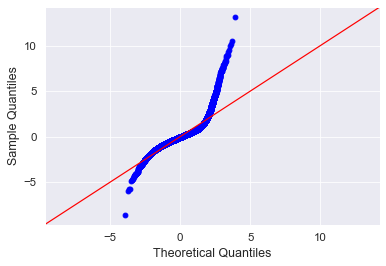

In [101]:
resid3 = model3.resid
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)

### Homoscedasticity check

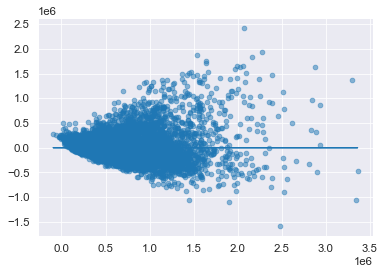

In [102]:
plt.scatter(model3.predict(predictors), model3.resid, alpha=0.5)
plt.plot(model3.predict(predictors), [0 for i in range(len(df_dummies))])

### Drop sqft_basement

In [103]:
df4 = df_dummies.drop(['sqft_basement'], axis=1)

### Location data

In [104]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "zipcode",  data = df4, palette='bright')

<AxesSubplot:xlabel='long', ylabel='lat'>

<AxesSubplot:xlabel='zipcode', ylabel='price'>

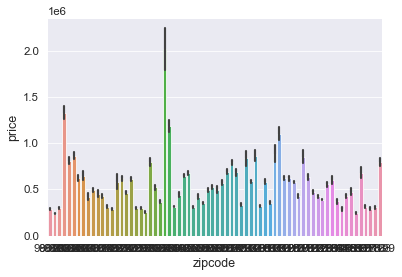

In [105]:
sns.barplot('zipcode', 'price', data=df4)

using zipcode results in a lot of categories, and will translate to many dummies/new columns. Let's try to find some other means to group locations.

In [106]:
location_df = pd.read_csv('data/All_Zipcodes_and_PO_Box_as_Centroids_for_King_County.csv')
location_df.head(20)

X          Y  OBJECTID    ZIP  ZIPCODE  COUNTY ZIP_TYPE  \
0  -122.584242  47.855762         1  98364    98364    35.0   PO Box   
1  -122.202454  47.620601         2  98009    98009    33.0   PO Box   
2  -122.186795  47.611861         3  98015    98015    33.0   PO Box   
3  -121.972726  47.419935         4  98025    98025    33.0   PO Box   
4  -122.234416  47.380592         5  98035    98035    33.0   PO Box   
5  -122.199724  47.761150         6  98041    98041    33.0   PO Box   
6  -121.935435  47.525299         7  98050    98050    33.0   PO Box   
7  -122.361610  47.466937         8  98062    98062    33.0   PO Box   
8  -122.314202  47.307128         9  98063    98063    33.0   PO Box   
9  -122.199165  47.387373        10  98064    98064    33.0   PO Box   
10 -122.230054  47.310482        11  98071    98071    33.0   PO Box   
11 -122.194421  47.678519        12  98083    98083    33.0   PO Box   
12 -122.357513  47.300153        13  98093    98093    33.0   PO Box   
13 -122.328387  47.581518        14  98124    98124    33.0   PO Box   
14 -122.254990  47.456756        15  98138    98138    33.0   PO Box   
15 -122.312845  47.659517        16  98145    98145    33.0   PO Box   
16 -122.346375  47.733683        17  98160    98160    33.0   PO Box   
17 -122.338619  47.611384        18  98181    98181    33.0   Unique   
18 -122.333625  47.606268        19  98185    98185    33.0   Unique   
19 -122.334454  47.613208        20  98191    98191    33.0   Unique   

   PREFERRED_CITY FEATURE_SOURCE  
0     PORT GAMBLE   Placed Point  
1        BELLEVUE   Placed Point  
2        BELLEVUE   Placed Point  
3          HOBART   Placed Point  
4            KENT   Placed Point  
5         BOTHELL   Placed Point  
6         PRESTON   Placed Point  
7        SEAHURST   Placed Point  
8     FEDERAL WAY   Placed Point  
9            KENT   Placed Point  
10         AUBURN   Placed Point  
11       KIRKLAND   Placed Point  
12    FEDERAL WAY   Placed Point  
13        SEATTLE   Placed Point  
14        SEATTLE   Placed Point  
15        SEATTLE   Placed Point  
16        SEATTLE   Placed Point  
17        SEATTLE   Placed Point  
18        SEATTLE   Placed Point  
19        SEATTLE   Placed Point

In [107]:
location_df = location_df.drop(['X', 'Y', 'OBJECTID', 'ZIP', 'ZIP_TYPE', 'FEATURE_SOURCE'], axis=1)

In [108]:
location_df.head()

ZIPCODE  COUNTY PREFERRED_CITY
0    98364    35.0    PORT GAMBLE
1    98009    33.0       BELLEVUE
2    98015    33.0       BELLEVUE
3    98025    33.0         HOBART
4    98035    33.0           KENT

In [109]:
df4.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'yrs_since_reno', 'bed_bath_ratio', 'bedrooms_5plus',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3', 'view_4',
       'condition_3_4', 'condition_5'],
      dtype='object')

In [110]:
location_df = location_df.rename(columns={'ZIPCODE': 'zipcode', 'COUNTY': 'county', 'PREFERRED_CITY': 'city'})
location_df.columns

Index(['zipcode', 'county', 'city'], dtype='object')

In [111]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  261 non-null    int64  
 1   county   260 non-null    float64
 2   city     261 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ KB


In [112]:
location = location_df.drop(['county'], axis=1)

In [113]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zipcode  261 non-null    int64 
 1   city     261 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [114]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 0 to 21418
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21273 non-null  float64
 1   bathrooms       21273 non-null  float64
 2   sqft_living     21273 non-null  int64  
 3   sqft_lot        21273 non-null  int64  
 4   floors          21273 non-null  float64
 5   waterfront      21273 non-null  float64
 6   yr_built        21273 non-null  int64  
 7   zipcode         21273 non-null  int64  
 8   lat             21273 non-null  float64
 9   long            21273 non-null  float64
 10  sqft_living15   21273 non-null  int64  
 11  sqft_lot15      21273 non-null  int64  
 12  month           21273 non-null  int64  
 13  yrs_since_reno  21273 non-null  int64  
 14  bed_bath_ratio  21273 non-null  float64
 15  bedrooms_5plus  21273 non-null  uint8  
 16  grade_5         21273 non-null  uint8  
 17  grade_6         21273 non-null 

In [115]:
location[location.duplicated(subset='zipcode', keep=False)]

zipcode         city
21     98447       TACOMA
72     98022     ENUMCLAW
73     98022     ENUMCLAW
93     98047      PACIFIC
94     98047      PACIFIC
106    98072  WOODINVILLE
107    98072  WOODINVILLE
110    98077  WOODINVILLE
111    98077  WOODINVILLE
113    98092       AUBURN
114    98092       AUBURN
199    98354       MILTON
200    98354       MILTON
233    98422       TACOMA
234    98422       TACOMA
244    98447       TACOMA

In [116]:
location = location.drop_duplicates(subset='zipcode', keep='first')

In [117]:
location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 0 to 260
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zipcode  253 non-null    int64 
 1   city     253 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [118]:
df5 = pd.merge(df4, location, how='left', on='zipcode')

In [119]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 0 to 21272
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21273 non-null  float64
 1   bathrooms       21273 non-null  float64
 2   sqft_living     21273 non-null  int64  
 3   sqft_lot        21273 non-null  int64  
 4   floors          21273 non-null  float64
 5   waterfront      21273 non-null  float64
 6   yr_built        21273 non-null  int64  
 7   zipcode         21273 non-null  int64  
 8   lat             21273 non-null  float64
 9   long            21273 non-null  float64
 10  sqft_living15   21273 non-null  int64  
 11  sqft_lot15      21273 non-null  int64  
 12  month           21273 non-null  int64  
 13  yrs_since_reno  21273 non-null  int64  
 14  bed_bath_ratio  21273 non-null  float64
 15  bedrooms_5plus  21273 non-null  uint8  
 16  grade_5         21273 non-null  uint8  
 17  grade_6         21273 non-null 

In [120]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "city",  data = df5, palette='deep')

<AxesSubplot:xlabel='long', ylabel='lat'>

In [121]:
df5['city'].value_counts(normalize=True)

SEATTLE          0.413811
RENTON           0.073943
BELLEVUE         0.065341
KENT             0.055892
REDMOND          0.045645
KIRKLAND         0.045551
AUBURN           0.042401
FEDERAL WAY      0.036055
ISSAQUAH         0.034316
MAPLE VALLEY     0.027547
WOODINVILLE      0.021953
SAMMAMISH        0.020401
SAMMAMIISH       0.016829
SNOQUALMIE       0.014149
KENMORE          0.013209
MERCER ISLAND    0.013209
ENUMCLAW         0.010765
NORTH BEND       0.010154
BOTHELL          0.009073
DUVALL           0.008837
CARNATION        0.005359
VASHON           0.005124
BLACK DIAMOND    0.004607
FALL CITY        0.003620
MEDINA           0.002209
Name: city, dtype: float64

In [122]:
import folium

In [123]:
df5.lat.min()

47.1559

In [124]:
df5.lat.mean()

47.56023275043482

In [125]:
df5.long.mean()

-122.21371085413433

In [126]:
kc_coordinates = (47.55, -122.21)

In [127]:
kc_map = folium.Map(location=kc_coordinates)
kc_map

from folium.plugins import HeatMap
HeatMap(data=data).add_to(kc_map)
display(kc_map)

In [128]:
df5['city'] = df5['city'].str.title()

In [129]:
df5['city'].value_counts()

Seattle          8803
Renton           1573
Bellevue         1390
Kent             1189
Redmond           971
Kirkland          969
Auburn            902
Federal Way       767
Issaquah          730
Maple Valley      586
Woodinville       467
Sammamish         434
Sammamiish        358
Snoqualmie        301
Kenmore           281
Mercer Island     281
Enumclaw          229
North Bend        216
Bothell           193
Duvall            188
Carnation         114
Vashon            109
Black Diamond      98
Fall City          77
Medina             47
Name: city, dtype: int64

In [130]:
df5 = df5.replace(['Sammamiish'],'Sammamish')

In [131]:
df5['city'].value_counts()

Seattle          8803
Renton           1573
Bellevue         1390
Kent             1189
Redmond           971
Kirkland          969
Auburn            902
Sammamish         792
Federal Way       767
Issaquah          730
Maple Valley      586
Woodinville       467
Snoqualmie        301
Mercer Island     281
Kenmore           281
Enumclaw          229
North Bend        216
Bothell           193
Duvall            188
Carnation         114
Vashon            109
Black Diamond      98
Fall City          77
Medina             47
Name: city, dtype: int64

In [132]:
city_dummies = pd.get_dummies(df5['city'], prefix='city', drop_first=True)
df6 = pd.concat([df5, city_dummies], axis=1)
df6.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'yrs_since_reno', 'bed_bath_ratio', 'bedrooms_5plus',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3', 'view_4',
       'condition_3_4', 'condition_5', 'city', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple Valley',
       'city_Medina', 'city_Mercer Island', 'city_North Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville'],
      dtype='object')

In [133]:
df6.columns = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'yrs_since_reno', 'bed_bath_ratio', 'bedrooms_5plus',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3', 'view_4',
       'condition_3_4', 'condition_5', 'city', 'city_Bellevue',
       'city_Black_Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall_City', 'city_Federal_Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple_Valley',
       'city_Medina', 'city_Mercer_Island', 'city_North_Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville']

In [134]:
import json

In [144]:
import os
geo_data_file = os.path.join('data', 'Cities_and_Unincorporated_King_County___city_kc_area.geojson')

In [ ]:
with open(geo_data_file) as f:
    geo_data = json.load(f)
print(type(data))

#### Remove unwanted cities from geodata

In [ ]:
tmp = geo_data

# remove cities not in data
geocities = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['CITYNAME'] in list(df6['city'].unique()):
        geocities.append(tmp['features'][i])

# creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geocities

# save uodated JSON object
open("data/cleaned_city_geodata.json", "w").write(json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': ')))

In [158]:
geo_data_cleaned = "data/cleaned_city_geodata.json"

In [159]:
kc_map = folium.Map(location=kc_coordinates, tiles="cartodbpositron", zoom_start=10.48)

In [160]:
kc_map.choropleth(geo_data=geo_data_cleaned,
             data=df6, # my dataset
             name='cloropleth',
             columns=['city', 'price'], # city is here for matching the geojson zipcode, price is the column that changes the color of city areas
             key_on='feature.properties.CITYNAME', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='GnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Price Scale')
kc_map

### Decisions
Removed feature:
- dropped 'sqft_basement' due to high p-value. Also, scatterplot shows that there are plenty of high priced homes with no basements.

Dummies:
- cities

## Model 4

In [149]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 0 to 21272
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21273 non-null  float64
 1   bathrooms           21273 non-null  float64
 2   sqft_living         21273 non-null  int64  
 3   sqft_lot            21273 non-null  int64  
 4   floors              21273 non-null  float64
 5   waterfront          21273 non-null  float64
 6   yr_built            21273 non-null  int64  
 7   zipcode             21273 non-null  int64  
 8   lat                 21273 non-null  float64
 9   long                21273 non-null  float64
 10  sqft_living15       21273 non-null  int64  
 11  sqft_lot15          21273 non-null  int64  
 12  month               21273 non-null  int64  
 13  yrs_since_reno      21273 non-null  int64  
 14  bed_bath_ratio      21273 non-null  float64
 15  bedrooms_5plus      21273 non-null  uint8  
 16  grad

In [150]:
outcome = 'price'
cols = list(df6.columns)
unwanted = ['price', 'zipcode', 'city']
x_cols = [e for e in cols if e not in unwanted]

In [151]:
pred_sum = '+'.join(x_cols)
formula = outcome + '~' + pred_sum
model4 = ols(formula=formula, data=df6).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1421.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:33:00   Log-Likelihood:            -2.8615e+05
No. Observations:               21273   AIC:                         5.724e+05
Df Residuals:                   21221   BIC:                         5.728e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -7.379e+07   3.51e+06    -21.048      0.000   -8.07e+07   -6.69e+07
bathrooms           3.033e+04   3592.753      8.441      0.000    2.33e+04    3.74e+04
sqft_living          116.6287      2.915     40.016      0.000     110.916     122.342
sqft_lot               0.2710      0.054      5.048      0.000       0.166       0.376
floors              3.079e+04   2825.053     10.899      0.000    2.53e+04    3.63e+04
waterfront          4.286e+05   1.59e+04     26.884      0.000    3.97e+05     4.6e+05
yr_built           -1811.9726     62.273    -29.097      0.000   -1934.032   -1689.913
lat                  6.14e+05   1.83e+04     33.547      0.000    5.78e+05     6.5e+05
long               -3.943e+05   2.83e+04    -13.939      0.000    -4.5e+05   -3.39e+05
sqft_living15         29.4016      3.013      9.757      0.000      23.495      35.308
sqft_lot15            -0.2326      0.074     -3.164      0.002      -0.377      -0.089
month              -2842.5568    371.007     -7.662      0.000   -3569.759   -2115.354
yrs_since_reno       -21.0860      3.342     -6.310      0.000     -27.636     -14.536
bed_bath_ratio     -6581.6718   2994.075     -2.198      0.028   -1.25e+04    -713.057
bedrooms_5plus     -2.066e+04   4916.225     -4.203      0.000   -3.03e+04    -1.1e+04
grade_5             1805.8696   4.65e+04      0.039      0.969   -8.93e+04    9.29e+04
grade_6             9341.8402   4.53e+04      0.206      0.837   -7.94e+04    9.81e+04
grade_7             4.746e+04   4.52e+04      1.049      0.294   -4.12e+04    1.36e+05
grade_8             9.872e+04   4.54e+04      2.177      0.030    9824.049    1.88e+05
grade_9             2.094e+05   4.56e+04      4.593      0.000     1.2e+05    2.99e+05
grade_10            3.648e+05   4.59e+04      7.943      0.000    2.75e+05    4.55e+05
grade_11            5.863e+05   4.68e+04     12.542      0.000    4.95e+05    6.78e+05
grade_12            9.429e+05      5e+04     18.870      0.000    8.45e+05    1.04e+06
grade_13            1.551e+06    7.1e+04     21.846      0.000    1.41e+06    1.69e+06
view_1_2            6.478e+04   5122.029     12.648      0.000    5.47e+04    7.48e+04
view_3              1.261e+05   7962.544     15.831      0.000     1.1e+05    1.42e+05
view_4              2.968e+05   1.17e+04     25.278      0.000    2.74e+05     3.2e+05
condition_3_4       3.104e+04   1.27e+04      2.453      0.014    6236.957    5.58e+04
condition_5         8.682e+04   1.33e+04      6.551      0.000    6.08e+04    1.13e+05
city_Bellevue       1.995e+05   9308.213     21.436      0.000    1.81e+05    2.18e+05
city_Black_Diamond  1.434e+05    1.9e+04      7.557      0.000    1.06e+05    1.81e+05
city_Bothell       -1.404e+05   1.57e+04     -8.944      0.000   -1.71e+05    -1.1e+05
city_Carnation      3.502e+04   2.11e+

### Observations
High p-values:
- Grade 5, 6, 7
- city_Carnation (not too bad), city_Kent

In [152]:
X = df6[x_cols]
Y = df6['price']

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 25)
linreg4 = LinearRegression()
linreg4.fit(X_train, Y_train)
Y_pred = linreg4.predict(X_test)

In [154]:
mse_train = mean_squared_error(Y_train, linreg4.predict(X_train))
mse_test = mean_squared_error(Y_test, Y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 166369.9225799707
Test RMSE: 174414.09314273568


Lowest MSE so far

In [155]:
resid4 = model4.resid
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)
plt.title('Normal Q-Q Plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

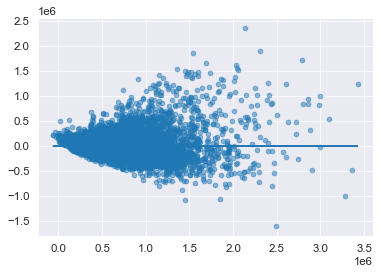

In [156]:
plt.scatter(model4.predict(df6[x_cols]), model4.resid, alpha=0.5)
plt.plot(model4.predict(df6[x_cols]), [0 for i in range(len(df6))])


In [157]:
df6.to_csv('data/data_fin.csv')